In [1]:
import json
from pprint import pprint
import glob
import os
import re
import cv2
import pandas as pd
import numpy as np
import sys

In [2]:
class Points(): 
    def __init__(self):
        self.frameNuber = -1
        self.xLeft = []
        self.xRight = []
        self.yLeft = []
        self.yRight = []
        self.cLeft = []
        self.cRight = []
        self.xBody = []
        self.yBody = []
        self.cBody = []
        self.totalCLeft = 0
        self.totalCRight = 0
        self.minDist = sys.float_info.max
    

In [3]:
class SortedCutPoint:
    def __init__(self):
        self.idxDistTransA = -1
        self.idxDistTransB = -1
        self.totalDifIdx = -1
        self.frameIdx = -1

In [12]:
def LoadTransition():
    trans = []
#     point_ins = Points()
#     point_ins.xLeft = []
    files = glob.glob("/home/yulia/openpose/outputScene8-1/*.json")
    ctrTrans = 0
    for f in files:
        fName = os.path.basename(f)
        number = re.split("(\d+)", fName)
        number = int(number[5])
        trans.append(Points())
        with open(f) as df:
            data = json.load(df)
            frameNumber = number
            trans[ctrTrans].frameNumber = number
            #each hand has 21 points. x,y,c --> 0 to 62
            for i in range(0,21):
                trans[ctrTrans].xLeft.append(data['people'][0]['hand_left_keypoints_2d'][i*3])
                trans[ctrTrans].yLeft.append(data['people'][0]['hand_left_keypoints_2d'][i*3+1])
                trans[ctrTrans].cLeft.append(data['people'][0]['hand_left_keypoints_2d'][i*3+2])
                trans[ctrTrans].xRight.append(data['people'][0]['hand_right_keypoints_2d'][i*3])
                trans[ctrTrans].yRight.append(data['people'][0]['hand_right_keypoints_2d'][i*3+1])
                trans[ctrTrans].cRight.append(data['people'][0]['hand_right_keypoints_2d'][i*3+2])
                trans[ctrTrans].totalCLeft += data['people'][0]['hand_left_keypoints_2d'][i*3+2]
                trans[ctrTrans].totalCRight += data['people'][0]['hand_right_keypoints_2d'][i*3+2]
            for i in range(0, 25):
                trans[ctrTrans].xBody.append(data['people'][0]['pose_keypoints_2d'][i*3])
                trans[ctrTrans].yBody.append(data['people'][0]['pose_keypoints_2d'][i*3+1])
                trans[ctrTrans].cBody.append(data['people'][0]['pose_keypoints_2d'][i*3+2])
        ctrTrans+=1
    return trans

In [13]:
trans = LoadTransition()

In [14]:
for item in trans:
    print(item.frameNumber)

266
1298
669
953
814
742
947
295
389
836
1278
1013
696
825
205
507
976
790
957
1292
781
752
932
527
703
1070
226
999
1265
443
252
909
739
686
1321
616
965
40
391
1250
565
885
186
1315
925
568
937
522
636
898
48
612
97
642
129
377
1125
1170
1240
955
1151
735
435
22
441
288
293
367
715
285
868
8
1173
720
515
102
897
1300
923
545
812
491
151
208
980
138
866
35
993
570
1163
1058
809
177
286
1303
403
846
1006
529
375
108
272
1260
497
106
227
1015
1312
457
167
631
1156
1232
517
1233
1184
412
1239
101
1081
815
131
713
551
652
1022
1209
4
209
385
1216
190
700
1283
578
659
281
1086
139
1078
1002
168
431
1046
345
178
1054
683
1169
187
1326
1282
357
1189
1061
236
371
414
1268
1000
1040
931
1270
805
878
259
154
705
721
247
757
175
76
59
941
463
1042
456
1203
611
598
858
592
745
472
519
0
911
1114
751
1038
1080
967
144
1077
37
233
358
90
353
865
1001
1182
1318
1222
490
388
418
489
204
914
1254
1008
1112
402
1323
900
671
596
453
506
229
819
214
1316
218
493
1066
1200
376
127
979
1253
620
480
320
915

In [7]:
wordsFrame = []
wordsFrame.append(Points())
ctrWordsFrame = 0
with open("/home/yulia/openpose/african_american/african_american_000000000060_keypoints.json") as df:
    data = json.load(df)
    wordsFrame[ctrWordsFrame].frameNumber = ctrWordsFrame
    #each hand has 21 points. x,y,c --> 0 to 62
    for i in range(0,21):
        wordsFrame[ctrWordsFrame].xLeft.append(data['people'][0]['hand_left_keypoints_2d'][i*3])
        wordsFrame[ctrWordsFrame].yLeft.append(data['people'][0]['hand_left_keypoints_2d'][i*3+1])
        wordsFrame[ctrWordsFrame].cLeft.append(data['people'][0]['hand_left_keypoints_2d'][i*3+2])
        wordsFrame[ctrWordsFrame].xRight.append(data['people'][0]['hand_right_keypoints_2d'][i*3])
        wordsFrame[ctrWordsFrame].yRight.append(data['people'][0]['hand_right_keypoints_2d'][i*3+1])
        wordsFrame[ctrWordsFrame].cRight.append(data['people'][0]['hand_right_keypoints_2d'][i*3+2])
    for i in range(0, 25):
        wordsFrame[ctrWordsFrame].xBody.append(data['people'][0]['pose_keypoints_2d'][i*3])
        wordsFrame[ctrWordsFrame].yBody.append(data['people'][0]['pose_keypoints_2d'][i*3+1])
        wordsFrame[ctrWordsFrame].cBody.append(data['people'][0]['pose_keypoints_2d'][i*3+2])

ctrWordsFrame+=1
wordsFrame.append(Points())
with open("/home/yulia/openpose/advisor1/advisor1_000000000000_keypoints.json") as df:
    data = json.load(df)
    wordsFrame[ctrWordsFrame].frameNumber = ctrWordsFrame

    #each hand has 21 points. x,y,c --> 0 to 62
    for i in range(0,21):
        wordsFrame[ctrWordsFrame].xLeft.append(data['people'][0]['hand_left_keypoints_2d'][i*3])
        wordsFrame[ctrWordsFrame].yLeft.append(data['people'][0]['hand_left_keypoints_2d'][i*3+1])
        wordsFrame[ctrWordsFrame].cLeft.append(data['people'][0]['hand_left_keypoints_2d'][i*3+2])
        wordsFrame[ctrWordsFrame].xRight.append(data['people'][0]['hand_right_keypoints_2d'][i*3])
        wordsFrame[ctrWordsFrame].yRight.append(data['people'][0]['hand_right_keypoints_2d'][i*3+1])
        wordsFrame[ctrWordsFrame].cRight.append(data['people'][0]['hand_right_keypoints_2d'][i*3+2])
    for i in range(0, 25):
        wordsFrame[ctrWordsFrame].xBody.append(data['people'][0]['pose_keypoints_2d'][i*3])
        wordsFrame[ctrWordsFrame].yBody.append(data['people'][0]['pose_keypoints_2d'][i*3+1])
        wordsFrame[ctrWordsFrame].cBody.append(data['people'][0]['pose_keypoints_2d'][i*3+2])

In [8]:
class Distance(object):
    def __init__(self):
        self.fiX = []
        self.fiY = []
        self.hjX = []
        self.hjY = []
        self.fiSubHj = []
        self.distance = 0
        self.From = -1
        self.To = -1
        self.wordFrom = -1
        self.wordTo = -1
        
#     def __repr__(self):
# #         return '{} {}'.format(self.idxTrans,
# #                               self.dist)
#         return self.idxTrans

# def getKey(custom):
#     return custom.dist   

In [9]:
transFrame = []
dist = []
transFrame.append(wordsFrame[0])
transFrame.append(wordsFrame[1])
tempTrans = trans.copy()
tempTrans.append(transFrame[0])
tempTrans.append(transFrame[1])
idx = 0
for i in range(0,len(tempTrans)):
    for j in range(i+1, len(tempTrans)):
        dist.append(Distance())
        for k in range(0, 21):
            xL1 = tempTrans[i].xLeft[k]
            yL1 = tempTrans[i].yLeft[k]
            xR1 = tempTrans[i].xRight[k]
            yR1 = tempTrans[i].yRight[k]
            xL2 = tempTrans[j].xLeft[k]
            yL2 = tempTrans[j].yLeft[k]
            xR2 = tempTrans[j].xRight[k]
            yR2 = tempTrans[j].yRight[k]

            dist[idx].fiX.append(xL1)
            dist[idx].fiX.append(xR1)

            dist[idx].hjX.append(xL2)
            dist[idx].hjX.append(xR2)

            dist[idx].fiY.append(yL1)
            dist[idx].fiY.append(yR1)

            dist[idx].hjY.append(yL2)
            dist[idx].hjY.append(yR2)

            dist1 = np.absolute(xL1-xL2)+np.absolute(yL1 - yL2)
            dist[idx].fiSubHj.append(dist1)

            dist2 = np.absolute(xR1 - xR2)+np.absolute(yR1 - yR2)
            dist[idx].fiSubHj.append(dist2)

        #get value at the minimum index of the substraction result ||fi-hj||
        minXI = dist[idx].fiX[dist[idx].fiSubHj.index(np.min(dist[idx].fiSubHj))]
        minYI = dist[idx].fiY[dist[idx].fiSubHj.index(np.min(dist[idx].fiSubHj))]
        minXJ = dist[idx].hjX[dist[idx].fiSubHj.index(np.min(dist[idx].fiSubHj))]
        minYJ = dist[idx].hjY[dist[idx].fiSubHj.index(np.min(dist[idx].fiSubHj))]

        fiMinHj = 0
        minFiHj = 0
        for k in range(0, 42):
            fiMinHj += np.absolute(dist[idx].fiX[k] - minXJ) + np.absolute(dist[idx].fiY[k] - minYJ)
            minFiHj += np.absolute(minXI - dist[idx].hjX[k]) + np.absolute(minYI - dist[idx].hjY[k])

        dist[idx].distance = fiMinHj / len(dist[idx].fiSubHj) + minFiHj / len(dist[idx].fiSubHj)
        dist[idx].From = tempTrans[i].frameNumber
        dist[idx].To = tempTrans[j].frameNumber
        
        if tempTrans[i].minDist > dist[idx].distance:
            tempTrans[i].minDist = dist[idx].distance
        if tempTrans[j].minDist > dist[idx].distance:
            tempTrans[j].minDist = dist[idx].distance
        
        if i >len(tempTrans)-3:
            dist[idx].wordFrom = tempTrans[i].frameNumber
        if j > len(tempTrans)-3:
            dist[idx].wordTo = tempTrans[j].frameNumber
        idx+=1

In [10]:
import copy
extremeNode = copy.copy(next((x for x in dist if x.wordFrom != -1 and x.wordTo != -1), None))

print(extremeNode.distance)

noOutlierDist = dist.copy()
# dist.sort(key = lambda x: x.distance, reverse = False)
noOutlierDist = list(filter(lambda x : x.distance <= extremeNode.distance, noOutlierDist))


vectorized_x = np.vectorize(lambda obj: obj.distance)
mu = np.mean(vectorized_x(noOutlierDist))
std = np.std(vectorized_x(noOutlierDist))
c = 2.0
thresh = mu + c*std 

print(std)

listToFindOutlier = tempTrans.copy()
del listToFindOutlier[-1]
del listToFindOutlier[-1]

354.77771428571435
71.35305577158029


In [13]:
for item in listToFindOutlier:
    print(item.minDist)

87.55785714285713
373.2021666666667
93.3891904761905
322.74447619047623
112.08804761904761
174.91949999999997
198.26245238095237
118.29959523809521
306.75504761904773
88.85314285714286
102.41985714285713
333.38126190476186
334.2618809523809
219.11566666666664
138.0356904761905
247.04809523809527
190.64878571428582
102.63414285714286
94.22761904761902
109.1397142857143
232.05135714285717
170.99528571428573
126.9082857142858
227.8317142857143
89.06697619047614
104.41526190476188
123.2399761904762
216.23566666666662
95.23283333333333
94.94357142857143
239.352619047619
107.7730952380952
104.34002380952383
147.6372380952381
122.94680952380958
271.35121428571426
251.06385714285713
87.80219047619052
147.03402380952372
95.99480952380947
114.63283333333334
131.38409523809526
100.69152380952377
185.8345476190477
343.6549285714286
343.1851190476192
83.59152380952379
102.15471428571425
110.65792857142861
291.1577380952381
174.15442857142853
104.14707142857151
79.96233333333342
113.32373809523807
1

In [14]:
print(thresh)

378.00715165681515


In [11]:
# vectorized_outlier = np.vectorize(lambda obj : obj.frameNumber)
# outlier = vectorized_outlier(list(filter(lambda x:x.minDist > thresh, listToFindOutlier)))
# noOutlierDist = (list(filter(lambda x: x.From not in outlier or x.To not in outlier, noOutlierDist)))

ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

In [15]:
nonOutlier = vectorized_outlier(list(filter(lambda x:x.minDist <= thresh, listToFindOutlier)))
# np.std(vectorized_x(noOutlierDist))
# std
len(nonOutlier)

123

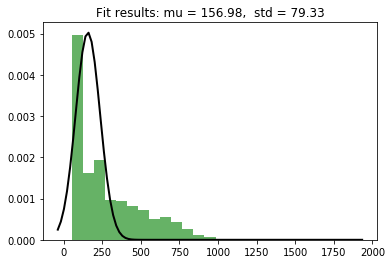

In [18]:
# mu = sum(obj.distance for obj in dist[0])/len(dist[0])
from scipy.stats import norm
import matplotlib.pyplot as plt


plt.hist(vectorized_x(dist), bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
import seaborn as sns
sns.boxplot(x=vectorized_x(dist[0]))

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(vectorized_x(dist[0])))
print(z)

In [ ]:
threshold = 3
print(np.where(z > 3))

In [ ]:
# from scipy.stats import norm
# import matplotlib.pyplot as plt

# mu = np.mean(data); std = np.std(data)

In [193]:
def CalculateCs(path):
    distance = 0
    for i in range(0, len(path)-1):
        if(i == 0):
            wFrom = path[i].frameNumber
        else:
            wFrom = -1
        if(i+1 == len(path)-1):
            wTo = path[i+1].frameNumber
        else:
            wTo = -1
        distance +=  list(filter(lambda x : ((x.From == path[i].frameNumber and x.To == path[i+1].frameNumber) or (x.From == path[i+1].frameNumber and x.To == path[i].frameNumber)) and ((x.wordFrom == wFrom and x.wordTo == wTo) or (x.wordFrom == wTo and x.wordTo == wFrom)), dist))[0].distance
        
    avg = distance / (len(path)-1)
    return 1/extremeNode.distance * avg, avg

In [220]:
def CalculateCu(path, avg):
    var = 0
    for i in range(0, len(path)-1):
        if(i == 0):
            wFrom = path[i].frameNumber
        else:
            wFrom = -1
        if(i+1 == len(path)-1):
            wTo = path[i+1].frameNumber
        else:
            wTo = -1
        tDist =  list(filter(lambda x : ((x.From == path[i].frameNumber and x.To == path[i+1].frameNumber) or (x.From == path[i+1].frameNumber and x.To == path[i].frameNumber)) and ((x.wordFrom == wFrom and x.wordTo == wTo) or (x.wordFrom == wTo and x.wordTo == wFrom)), dist))[0].distance
        var += pow(tDist-avg,2)
    variance = var / (len(path)-1)
    return variance
    

In [206]:
def CalculateCd(path):
    ctr = 0
    tDist = 0
    for i in range(0, len(path)-1):
        for j in range(i+1,len(path)):
            if(i == 0):
                wFrom = path[i].frameNumber
            else:
                wFrom = -1
            if(j == len(path)-1):
                wTo = path[j].frameNumber
            else:
                wTo = -1
            tDist +=  list(filter(lambda x : ((x.From == path[i].frameNumber and x.To == path[j].frameNumber) or (x.From == path[j].frameNumber and x.To == path[i].frameNumber)) and ((x.wordFrom == wFrom and x.wordTo == wTo) or (x.wordFrom == wTo and x.wordTo == wFrom)), dist))[0].distance
            ctr+=1
    return 1/extremeNode.distance * tDist / (ctr*(ctr-1))

In [207]:
def CostFunction (arr_path):
    Cs,avg = CalculateCs(arr_path)
    Cu = CalculateCu(arr_path, avg)
    Cd = CalculateCd(arr_path)
    lambda1 = 2.5
    lambda2 = 0.5
    return Cs + lambda1*Cu + lambda2*(1-Cd)

In [208]:
def temperature(fraction):
    """ Example of temperature dicreasing as the process goes on."""
    return max(0.01, min(1, 1 - fraction))

In [218]:
path_length = 10
arr_path = []
arr_path.append(wordsFrame[0])
path_idx = random.sample(range(0, len(listToFindOutlier)), path_length-2)
for i in range(0,path_length-2):
    arr_path.append(listToFindOutlier[path_idx[i]])
arr_path.append(wordsFrame[1])
T = 1
COld = CostFunction(arr_path)

574.095357142857
369.7458095238095
9
498.3308809523809
369.7458095238095
9
358.15247619047625
369.7458095238095
9
375.77488095238107
369.7458095238095
9
260.3701904761904
369.7458095238095
9
337.4692380952381
369.7458095238095
9
331.91157142857145
369.7458095238095
9
285.9363809523808
369.7458095238095
9
305.67130952380955
369.7458095238095
9


In [225]:
import random
path_length = 20
arr_path = []
arr_path.append(wordsFrame[0])
path_idx = random.sample(range(0, len(listToFindOutlier)), path_length-2)
for i in range(0,path_length-2):
    arr_path.append(listToFindOutlier[path_idx[i]])
arr_path.append(wordsFrame[1])
T = 1
COld = CostFunction(arr_path)
paths, costs = [arr_path],[COld]
maxsteps = 1000
for step in range(maxsteps):
    fraction = step / float(maxsteps)
    T = temperature(fraction)
    new_arr_path = []
    new_arr_path.append(wordsFrame[0])
    path_idx = random.sample(range(0, len(listToFindOutlier)), path_length-2)
    for i in range(0,path_length-2):
        new_arr_path.append(listToFindOutlier[path_idx[i]])
    new_arr_path.append(wordsFrame[1])
    CNew = CostFunction(new_arr_path)
    deltaC = CNew - COld
    print("T : " + str(T) + " | Step : " + str(step) + " | COLD : " + str(COld) + " | CNEW : " + str(CNew) + " | deltaC : "+ str(deltaC))
    if deltaC <= 0 :
#         or np.exp(-1*deltaC/T) <= random.random()
        arr_path = new_arr_path
        COld = CNew
        paths.append(arr_path)
        costs.append(COld)

T : 1 | Step : 0 | COLD : 48239.580032898906 | CNEW : 44821.246111036955 | deltaC : -3418.3339218619512
T : 0.999 | Step : 1 | COLD : 44821.246111036955 | CNEW : 45662.01499408404 | deltaC : 840.768883047087
T : 0.998 | Step : 2 | COLD : 44821.246111036955 | CNEW : 54599.01338484378 | deltaC : 9777.767273806829
T : 0.997 | Step : 3 | COLD : 44821.246111036955 | CNEW : 24018.013038178615 | deltaC : -20803.23307285834
T : 0.996 | Step : 4 | COLD : 24018.013038178615 | CNEW : 57050.817486364154 | deltaC : 33032.80444818554
T : 0.995 | Step : 5 | COLD : 24018.013038178615 | CNEW : 63472.05399098846 | deltaC : 39454.040952809846
T : 0.994 | Step : 6 | COLD : 24018.013038178615 | CNEW : 30544.778484929146 | deltaC : 6526.765446750531
T : 0.993 | Step : 7 | COLD : 24018.013038178615 | CNEW : 38685.20405105056 | deltaC : 14667.191012871946
T : 0.992 | Step : 8 | COLD : 24018.013038178615 | CNEW : 23329.59702732297 | deltaC : -688.4160108556462
T : 0.991 | Step : 9 | COLD : 23329.59702732297 | 

T : 0.923 | Step : 77 | COLD : 12803.89772808409 | CNEW : 47609.22698450615 | deltaC : 34805.32925642206
T : 0.922 | Step : 78 | COLD : 12803.89772808409 | CNEW : 57745.526141198556 | deltaC : 44941.628413114464
T : 0.921 | Step : 79 | COLD : 12803.89772808409 | CNEW : 31890.935294692328 | deltaC : 19087.03756660824
T : 0.92 | Step : 80 | COLD : 12803.89772808409 | CNEW : 40334.73041545435 | deltaC : 27530.83268737026
T : 0.919 | Step : 81 | COLD : 12803.89772808409 | CNEW : 47173.84505423492 | deltaC : 34369.947326150825
T : 0.918 | Step : 82 | COLD : 12803.89772808409 | CNEW : 44211.59326097715 | deltaC : 31407.695532893056
T : 0.917 | Step : 83 | COLD : 12803.89772808409 | CNEW : 27570.58138157644 | deltaC : 14766.683653492351
T : 0.916 | Step : 84 | COLD : 12803.89772808409 | CNEW : 42012.82862066499 | deltaC : 29208.930892580895
T : 0.915 | Step : 85 | COLD : 12803.89772808409 | CNEW : 32117.089865835682 | deltaC : 19313.19213775159
T : 0.914 | Step : 86 | COLD : 12803.89772808409

T : 0.845 | Step : 155 | COLD : 12803.89772808409 | CNEW : 43616.06366447858 | deltaC : 30812.165936394485
T : 0.844 | Step : 156 | COLD : 12803.89772808409 | CNEW : 55369.000021709166 | deltaC : 42565.102293625074
T : 0.843 | Step : 157 | COLD : 12803.89772808409 | CNEW : 35301.74121183781 | deltaC : 22497.84348375372
T : 0.842 | Step : 158 | COLD : 12803.89772808409 | CNEW : 29397.65059304002 | deltaC : 16593.75286495593
T : 0.841 | Step : 159 | COLD : 12803.89772808409 | CNEW : 9972.071052604642 | deltaC : -2831.8266754794477
T : 0.84 | Step : 160 | COLD : 9972.071052604642 | CNEW : 24688.56035453262 | deltaC : 14716.489301927977
T : 0.839 | Step : 161 | COLD : 9972.071052604642 | CNEW : 58572.47718507747 | deltaC : 48600.406132472825
T : 0.838 | Step : 162 | COLD : 9972.071052604642 | CNEW : 34263.02283252673 | deltaC : 24290.95177992209
T : 0.837 | Step : 163 | COLD : 9972.071052604642 | CNEW : 56595.370133210694 | deltaC : 46623.299080606055
T : 0.836 | Step : 164 | COLD : 9972.0

T : 0.77 | Step : 230 | COLD : 9972.071052604642 | CNEW : 64492.9202303581 | deltaC : 54520.84917775345
T : 0.769 | Step : 231 | COLD : 9972.071052604642 | CNEW : 48406.97138839507 | deltaC : 38434.90033579043
T : 0.768 | Step : 232 | COLD : 9972.071052604642 | CNEW : 52020.82755517598 | deltaC : 42048.75650257134
T : 0.767 | Step : 233 | COLD : 9972.071052604642 | CNEW : 38530.84451868968 | deltaC : 28558.773466085036
T : 0.766 | Step : 234 | COLD : 9972.071052604642 | CNEW : 37336.700026575534 | deltaC : 27364.628973970892
T : 0.765 | Step : 235 | COLD : 9972.071052604642 | CNEW : 48044.90124136146 | deltaC : 38072.83018875682
T : 0.764 | Step : 236 | COLD : 9972.071052604642 | CNEW : 39504.2218227973 | deltaC : 29532.150770192657
T : 0.763 | Step : 237 | COLD : 9972.071052604642 | CNEW : 24700.90791330164 | deltaC : 14728.836860696996
T : 0.762 | Step : 238 | COLD : 9972.071052604642 | CNEW : 13756.015480637412 | deltaC : 3783.94442803277
T : 0.761 | Step : 239 | COLD : 9972.0710526

T : 0.694 | Step : 306 | COLD : 9972.071052604642 | CNEW : 66672.46155493935 | deltaC : 56700.3905023347
T : 0.6930000000000001 | Step : 307 | COLD : 9972.071052604642 | CNEW : 37244.29479324122 | deltaC : 27272.22374063658
T : 0.692 | Step : 308 | COLD : 9972.071052604642 | CNEW : 54997.48834068371 | deltaC : 45025.41728807907
T : 0.6910000000000001 | Step : 309 | COLD : 9972.071052604642 | CNEW : 51919.125687308966 | deltaC : 41947.05463470433
T : 0.69 | Step : 310 | COLD : 9972.071052604642 | CNEW : 30299.76306089438 | deltaC : 20327.692008289738
T : 0.6890000000000001 | Step : 311 | COLD : 9972.071052604642 | CNEW : 27821.515350202328 | deltaC : 17849.444297597685
T : 0.688 | Step : 312 | COLD : 9972.071052604642 | CNEW : 45399.65230824843 | deltaC : 35427.58125564379
T : 0.687 | Step : 313 | COLD : 9972.071052604642 | CNEW : 37254.61924939423 | deltaC : 27282.548196789587
T : 0.6859999999999999 | Step : 314 | COLD : 9972.071052604642 | CNEW : 34790.08733460627 | deltaC : 24818.016

T : 0.619 | Step : 381 | COLD : 9972.071052604642 | CNEW : 61683.899096676236 | deltaC : 51711.82804407159
T : 0.618 | Step : 382 | COLD : 9972.071052604642 | CNEW : 44993.902216932845 | deltaC : 35021.83116432821
T : 0.617 | Step : 383 | COLD : 9972.071052604642 | CNEW : 45398.3500717881 | deltaC : 35426.279019183465
T : 0.616 | Step : 384 | COLD : 9972.071052604642 | CNEW : 37761.43811445578 | deltaC : 27789.367061851135
T : 0.615 | Step : 385 | COLD : 9972.071052604642 | CNEW : 56946.47877024165 | deltaC : 46974.407717637005
T : 0.614 | Step : 386 | COLD : 9972.071052604642 | CNEW : 50080.21073669248 | deltaC : 40108.139684087844
T : 0.613 | Step : 387 | COLD : 9972.071052604642 | CNEW : 31528.15644330885 | deltaC : 21556.085390704207
T : 0.612 | Step : 388 | COLD : 9972.071052604642 | CNEW : 37474.75705733856 | deltaC : 27502.686004733918
T : 0.611 | Step : 389 | COLD : 9972.071052604642 | CNEW : 37605.70658187523 | deltaC : 27633.63552927059
T : 0.61 | Step : 390 | COLD : 9972.071

T : 0.544 | Step : 456 | COLD : 9972.071052604642 | CNEW : 39864.33403912841 | deltaC : 29892.262986523765
T : 0.5429999999999999 | Step : 457 | COLD : 9972.071052604642 | CNEW : 45536.8099945745 | deltaC : 35564.73894196986
T : 0.542 | Step : 458 | COLD : 9972.071052604642 | CNEW : 43819.75265431717 | deltaC : 33847.681601712524
T : 0.5409999999999999 | Step : 459 | COLD : 9972.071052604642 | CNEW : 17382.16433768052 | deltaC : 7410.093285075876
T : 0.54 | Step : 460 | COLD : 9972.071052604642 | CNEW : 51702.15600740306 | deltaC : 41730.08495479841
T : 0.5389999999999999 | Step : 461 | COLD : 9972.071052604642 | CNEW : 28858.713030554653 | deltaC : 18886.64197795001
T : 0.538 | Step : 462 | COLD : 9972.071052604642 | CNEW : 38276.00249317954 | deltaC : 28303.9314405749
T : 0.5369999999999999 | Step : 463 | COLD : 9972.071052604642 | CNEW : 51740.1739130604 | deltaC : 41768.10286045575
T : 0.536 | Step : 464 | COLD : 9972.071052604642 | CNEW : 75651.50404621552 | deltaC : 65679.4329936

T : 0.46699999999999997 | Step : 533 | COLD : 9972.071052604642 | CNEW : 43517.61794153574 | deltaC : 33545.5468889311
T : 0.46599999999999997 | Step : 534 | COLD : 9972.071052604642 | CNEW : 48158.58991654527 | deltaC : 38186.518863940626
T : 0.46499999999999997 | Step : 535 | COLD : 9972.071052604642 | CNEW : 41397.65307453059 | deltaC : 31425.58202192595
T : 0.46399999999999997 | Step : 536 | COLD : 9972.071052604642 | CNEW : 49525.59353554605 | deltaC : 39553.52248294141
T : 0.46299999999999997 | Step : 537 | COLD : 9972.071052604642 | CNEW : 49609.36917265754 | deltaC : 39637.2981200529
T : 0.46199999999999997 | Step : 538 | COLD : 9972.071052604642 | CNEW : 51945.18389269063 | deltaC : 41973.11284008599
T : 0.46099999999999997 | Step : 539 | COLD : 9972.071052604642 | CNEW : 31919.450245004868 | deltaC : 21947.379192400225
T : 0.45999999999999996 | Step : 540 | COLD : 9972.071052604642 | CNEW : 39855.81642366898 | deltaC : 29883.745371064335
T : 0.45899999999999996 | Step : 541 |

T : 0.398 | Step : 602 | COLD : 9972.071052604642 | CNEW : 27990.83915054946 | deltaC : 18018.768097944816
T : 0.397 | Step : 603 | COLD : 9972.071052604642 | CNEW : 33730.13959246725 | deltaC : 23758.068539862605
T : 0.396 | Step : 604 | COLD : 9972.071052604642 | CNEW : 64550.41341100889 | deltaC : 54578.34235840425
T : 0.395 | Step : 605 | COLD : 9972.071052604642 | CNEW : 22732.403667110048 | deltaC : 12760.332614505405
T : 0.394 | Step : 606 | COLD : 9972.071052604642 | CNEW : 33895.29872918699 | deltaC : 23923.227676582344
T : 0.393 | Step : 607 | COLD : 9972.071052604642 | CNEW : 46292.4234797364 | deltaC : 36320.35242713176
T : 0.392 | Step : 608 | COLD : 9972.071052604642 | CNEW : 22813.434523658085 | deltaC : 12841.363471053442
T : 0.391 | Step : 609 | COLD : 9972.071052604642 | CNEW : 38073.662254748364 | deltaC : 28101.59120214372
T : 0.39 | Step : 610 | COLD : 9972.071052604642 | CNEW : 31514.853497007676 | deltaC : 21542.782444403034
T : 0.389 | Step : 611 | COLD : 9972.0

T : 0.32299999999999995 | Step : 677 | COLD : 9972.071052604642 | CNEW : 35760.31805748158 | deltaC : 25788.247004876936
T : 0.32199999999999995 | Step : 678 | COLD : 9972.071052604642 | CNEW : 63304.593658167 | deltaC : 53332.522605562364
T : 0.32099999999999995 | Step : 679 | COLD : 9972.071052604642 | CNEW : 54367.79262966067 | deltaC : 44395.72157705603
T : 0.31999999999999995 | Step : 680 | COLD : 9972.071052604642 | CNEW : 34483.725650979024 | deltaC : 24511.65459837438
T : 0.31899999999999995 | Step : 681 | COLD : 9972.071052604642 | CNEW : 58990.68461142552 | deltaC : 49018.61355882087
T : 0.31799999999999995 | Step : 682 | COLD : 9972.071052604642 | CNEW : 42763.72779007133 | deltaC : 32791.65673746669
T : 0.31699999999999995 | Step : 683 | COLD : 9972.071052604642 | CNEW : 49905.312929883825 | deltaC : 39933.241877279186
T : 0.31599999999999995 | Step : 684 | COLD : 9972.071052604642 | CNEW : 45706.41014305196 | deltaC : 35734.33909044732
T : 0.31499999999999995 | Step : 685 

T : 0.251 | Step : 749 | COLD : 9972.071052604642 | CNEW : 23912.978212139973 | deltaC : 13940.90715953533
T : 0.25 | Step : 750 | COLD : 9972.071052604642 | CNEW : 69802.36048752323 | deltaC : 59830.28943491858
T : 0.249 | Step : 751 | COLD : 9972.071052604642 | CNEW : 63347.230002777746 | deltaC : 53375.15895017311
T : 0.248 | Step : 752 | COLD : 9972.071052604642 | CNEW : 37642.81775548699 | deltaC : 27670.74670288235
T : 0.247 | Step : 753 | COLD : 9972.071052604642 | CNEW : 54949.34676230428 | deltaC : 44977.275709699636
T : 0.246 | Step : 754 | COLD : 9972.071052604642 | CNEW : 37609.548139699094 | deltaC : 27637.477087094452
T : 0.245 | Step : 755 | COLD : 9972.071052604642 | CNEW : 44843.970809037484 | deltaC : 34871.899756432846
T : 0.244 | Step : 756 | COLD : 9972.071052604642 | CNEW : 50157.19253719612 | deltaC : 40185.12148459148
T : 0.243 | Step : 757 | COLD : 9972.071052604642 | CNEW : 41026.865499793545 | deltaC : 31054.794447188902
T : 0.242 | Step : 758 | COLD : 9972.0

T : 0.18100000000000005 | Step : 819 | COLD : 9972.071052604642 | CNEW : 37949.07081583541 | deltaC : 27976.999763230768
T : 0.18000000000000005 | Step : 820 | COLD : 9972.071052604642 | CNEW : 34388.45483190938 | deltaC : 24416.38377930474
T : 0.17900000000000005 | Step : 821 | COLD : 9972.071052604642 | CNEW : 45567.0508518919 | deltaC : 35594.97979928726
T : 0.17800000000000005 | Step : 822 | COLD : 9972.071052604642 | CNEW : 41469.97793577127 | deltaC : 31497.906883166626
T : 0.17700000000000005 | Step : 823 | COLD : 9972.071052604642 | CNEW : 39986.27401703131 | deltaC : 30014.20296442667
T : 0.17600000000000005 | Step : 824 | COLD : 9972.071052604642 | CNEW : 41921.96221265174 | deltaC : 31949.8911600471
T : 0.17500000000000004 | Step : 825 | COLD : 9972.071052604642 | CNEW : 32356.025001074053 | deltaC : 22383.95394846941
T : 0.17400000000000004 | Step : 826 | COLD : 9972.071052604642 | CNEW : 45877.74517535806 | deltaC : 35905.67412275342
T : 0.17300000000000004 | Step : 827 | 

T : 0.10999999999999999 | Step : 890 | COLD : 9972.071052604642 | CNEW : 34125.89340715803 | deltaC : 24153.822354553387
T : 0.10899999999999999 | Step : 891 | COLD : 9972.071052604642 | CNEW : 48772.74251451592 | deltaC : 38800.671461911275
T : 0.10799999999999998 | Step : 892 | COLD : 9972.071052604642 | CNEW : 45864.455166592445 | deltaC : 35892.384113987806
T : 0.10699999999999998 | Step : 893 | COLD : 9972.071052604642 | CNEW : 14983.827864705827 | deltaC : 5011.756812101185
T : 0.10599999999999998 | Step : 894 | COLD : 9972.071052604642 | CNEW : 22873.19709140017 | deltaC : 12901.126038795526
T : 0.10499999999999998 | Step : 895 | COLD : 9972.071052604642 | CNEW : 42714.013575354205 | deltaC : 32741.942522749563
T : 0.10399999999999998 | Step : 896 | COLD : 9972.071052604642 | CNEW : 41971.8915533575 | deltaC : 31999.820500752856
T : 0.10299999999999998 | Step : 897 | COLD : 9972.071052604642 | CNEW : 42287.949561577945 | deltaC : 32315.878508973303
T : 0.10199999999999998 | Step

T : 0.04200000000000004 | Step : 958 | COLD : 9972.071052604642 | CNEW : 42846.85450017327 | deltaC : 32874.783447568625
T : 0.041000000000000036 | Step : 959 | COLD : 9972.071052604642 | CNEW : 45566.36290548385 | deltaC : 35594.29185287921
T : 0.040000000000000036 | Step : 960 | COLD : 9972.071052604642 | CNEW : 49983.09999489732 | deltaC : 40011.02894229267
T : 0.039000000000000035 | Step : 961 | COLD : 9972.071052604642 | CNEW : 21366.147525854336 | deltaC : 11394.076473249694
T : 0.038000000000000034 | Step : 962 | COLD : 9972.071052604642 | CNEW : 19450.66043756782 | deltaC : 9478.58938496318
T : 0.03700000000000003 | Step : 963 | COLD : 9972.071052604642 | CNEW : 32103.30294293225 | deltaC : 22131.231890327606
T : 0.03600000000000003 | Step : 964 | COLD : 9972.071052604642 | CNEW : 28575.747808023 | deltaC : 18603.676755418357
T : 0.03500000000000003 | Step : 965 | COLD : 9972.071052604642 | CNEW : 27260.635387235994 | deltaC : 17288.56433463135
T : 0.03400000000000003 | Step : 

In [161]:
len(arr_path)
# len(dist)

10

In [133]:
def readVideo(vid):
    cap = vid
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(frameWidth)
    
    buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
    
    fc = 0
    ret = True

    while (fc < frameCount  and ret):
        ret, buf[fc] = cap.read()
        fc += 1

    cap.release()
    return buf

In [134]:
#read transition video and save to array of images
vidTrans = cv2.VideoCapture('/home/yulia/Documents/transition.mp4')
vidAfricanAmerican = cv2.VideoCapture('/home/yulia/Documents/ASL/african_american.mp4')
vidAdvisor = cv2.VideoCapture('/home/yulia/Documents/ASL/advisor1.mp4')
transImg = readVideo(vidTrans)

1920


In [135]:
wordsVid = []
wordsVid.append(readVideo(vidAfricanAmerican))
wordsVid.append(readVideo(vidAdvisor))

1920
1920


In [222]:
writtenTrans = []
# transFrame.pop(0)
# transFrame.pop(len(transFrame)-1)
for i in range(1,len(arr_path)-1):
    writtenTrans.append(transImg[arr_path[i].frameNumber])
    print(arr_path[i].frameNumber)
# for i in range(0,sortedCutPoint[0].idxDistTransA):
#     writtenTrans.append(transImg[dist[0][i].idxTrans])
# for i in range(sortedCutPoint[0].idxDistTransB-1, -1, -1):
#     writtenTrans.append(transImg[dist[1][i].idxTrans])

29
113
30
115
17
77
104
42


In [223]:
totalWrittenFrames = []
totalWrittenFrames.append(wordsVid[0])
totalWrittenFrames.append(writtenTrans)
totalWrittenFrames.append(wordsVid[1])

In [224]:
height,width,channels = wordsVid[0][0].shape
out = cv2.VideoWriter('/home/yulia/outpyStillImg.mp4',cv2.VideoWriter_fourcc('F','M','P', '4'), 10, (width,height))
# out = cv2.VideoWriter('/home/yulia/outpyMax2.mp4',cv2.VideoWriter_fourcc('F','M','P', '4'), 10, (width,height))
for i in range(0, len(totalWrittenFrames)):
    for frame in range(0, len(totalWrittenFrames[i])):
        out.write(totalWrittenFrames[i][frame])
        print(frame)
out.release()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [ ]:
len(totalWrittenFrames[1])